1. Configuración Inicial

In [1]:
# Importamos Pandas para manejar las tablas de datos (filas y columnas)
import pandas as pd

# Importamos NumPy para operaciones matemáticas (a veces Seaborn lo pide por debajo)
import numpy as np

# Importamos Matplotlib, que es la base para dibujar (el lienzo)
import matplotlib.pyplot as plt

# Importamos Seaborn para hacer los gráficos bonitos y estadísticos rápido
import seaborn as sns

# Importamos Opendatasets para descargar desde Kaggle sin líos
import opendatasets as od

# Importamos OS para ver los archivos de la carpeta
import os

# Esto le dice a Seaborn que use un estilo con fondo blanco y rejilla (se ve más limpio)
sns.set_theme(style="whitegrid")

# Este comando mágico hace que los gráficos salgan ahí mismo en el notebook y no en ventanas aparte
%matplotlib inline

2. Descargar los Datos (Titanic)

In [2]:
# Definimos la URL del dataset. Usamos este link alternativo para evitar el error 401 de permisos
dataset_url = "https://www.kaggle.com/datasets/yasserh/titanic-dataset"

# Descargamos los datos. Si te pide clave, ya sabes: usuario + el código largo KGAT...
od.download(dataset_url)

# Verificamos qué se descargó imprimiendo los archivos de la carpeta actual
print("Archivos encontrados:", os.listdir())

Skipping, found downloaded files in ".\titanic-dataset" (use force=True to force download)
Archivos encontrados: ['.git', '.ipynb_checkpoints', 'Estructuras del Control.ipynb', 'Exam_Demo (1).ipynb', 'Ficheros.ipynb', 'grafico.png', 'img', 'introduccion Python.ipynb', 'iris', 'Librerias matplotlib.ipynb', 'Librerias Numpy.ipynb', 'pandas librerias parte2.ipynb', 'Pandas librerias.ipynb', 'posible_examen.ipynb', 'posible_examen2.ipynb', 'Python Data Types.ipynb', 'Python Funciones.ipynb', 'res', 'resultado_examen.csv', 'titanic-dataset']


3. Carga y Limpieza (Para que no falle nada)

In [3]:
# Cargamos el archivo CSV en una variable llamada 'df' (DataFrame)
# OJO: Revisa si la carpeta se llama 'titanic-dataset' con os.listdir() antes de correr esto
df = pd.read_csv('titanic-dataset/Titanic-Dataset.csv')

# --- LIMPIEZA RÁPIDA ---
# El gráfico falla si hay huecos vacíos en los números.
# df.dropna() elimina las filas que tengan vacíos en las columnas que le digamos.
# Aquí limpiamos 'Age' (Edad) y 'Fare' (Precio) porque son las que vamos a graficar.
df = df.dropna(subset=['Age', 'Fare'])

# Mostramos las primeras 5 filas para ver que todo cargó bien
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


4. GRÁFICO 1: El Explorador Total (Pairplot) 

Este es el mejor para empezar. Muestra todo contra todo.

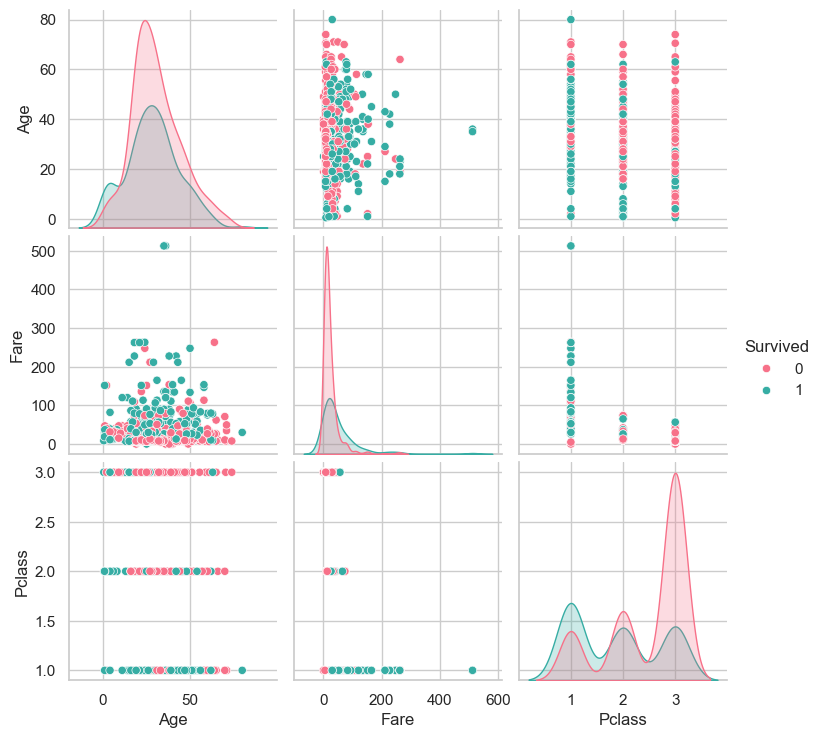

In [4]:
# Creamos una lista solo con las columnas numéricas que nos interesan para no saturar el gráfico
cols_interes = ['Age', 'Fare', 'Pclass', 'Survived']

# --- PAIRPLOT ---
# data: Usamos el df pero solo con las columnas que elegimos arriba
# hue='Survived': Pinta los puntos de diferente color: Naranja (Murió) vs Verde/Azul (Vivió)
# palette='husl': Es una paleta de colores bonita de Seaborn
sns.pairplot(data=df[cols_interes], hue='Survived', palette='husl')

# Mostramos el gráfico en pantalla
plt.show()

5. GRÁFICO 2: Dispersión + Histogramas (Jointplot) 

Nivel Pro. Muestra puntos en el centro y barras a los lados.

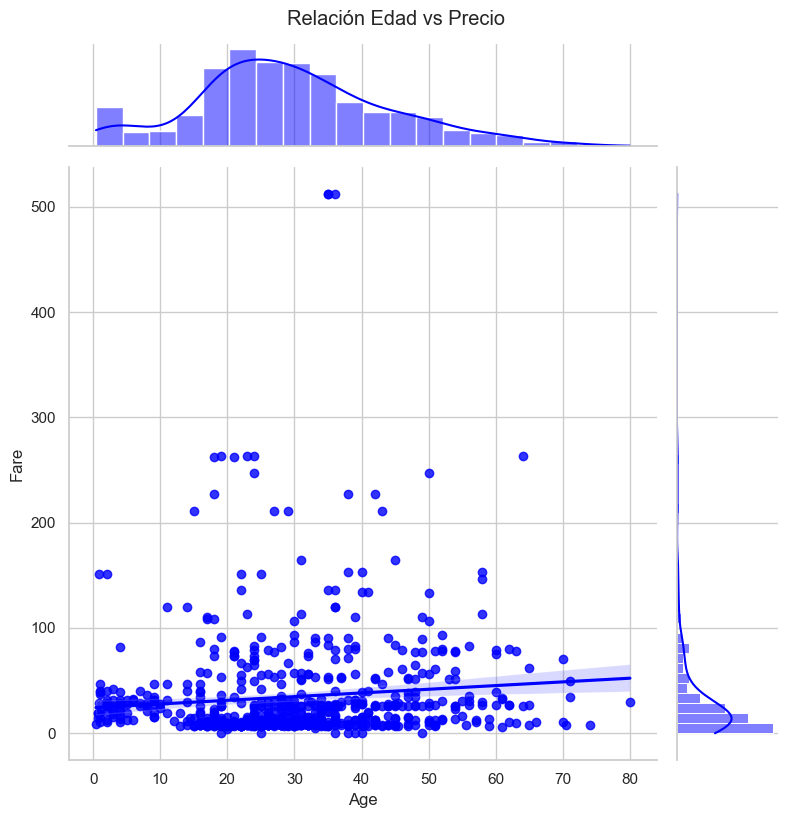

In [5]:
# --- JOINTPLOT ---
# x='Age': Eje horizontal es la Edad
# y='Fare': Eje vertical es el Precio del boleto
# kind='reg': Dibuja una línea de regresión (tendencia) y sombrea el intervalo de confianza
# color='blue': Color principal del gráfico
# height=8: Tamaño del cuadrado (8x8 pulgadas)
sns.jointplot(x='Age', y='Fare', data=df, kind='reg', color='blue', height=8)

# Ponemos un título general. y=1.02 es para subirlo un poquito y que no tape el gráfico
plt.suptitle("Relación Edad vs Precio", y=1.02)

# Mostramos el gráfico
plt.show()

6. GRÁFICO 3: Subplots (Varios dibujos juntos) 

Este es el que le gusta al Inge porque usa fig y ax como en el PDF.

C:\Users\RYZEN\AppData\Local\Temp\ipykernel_18468\2899803892.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Pclass', y='Fare', ax=axes[1], palette='Set2')


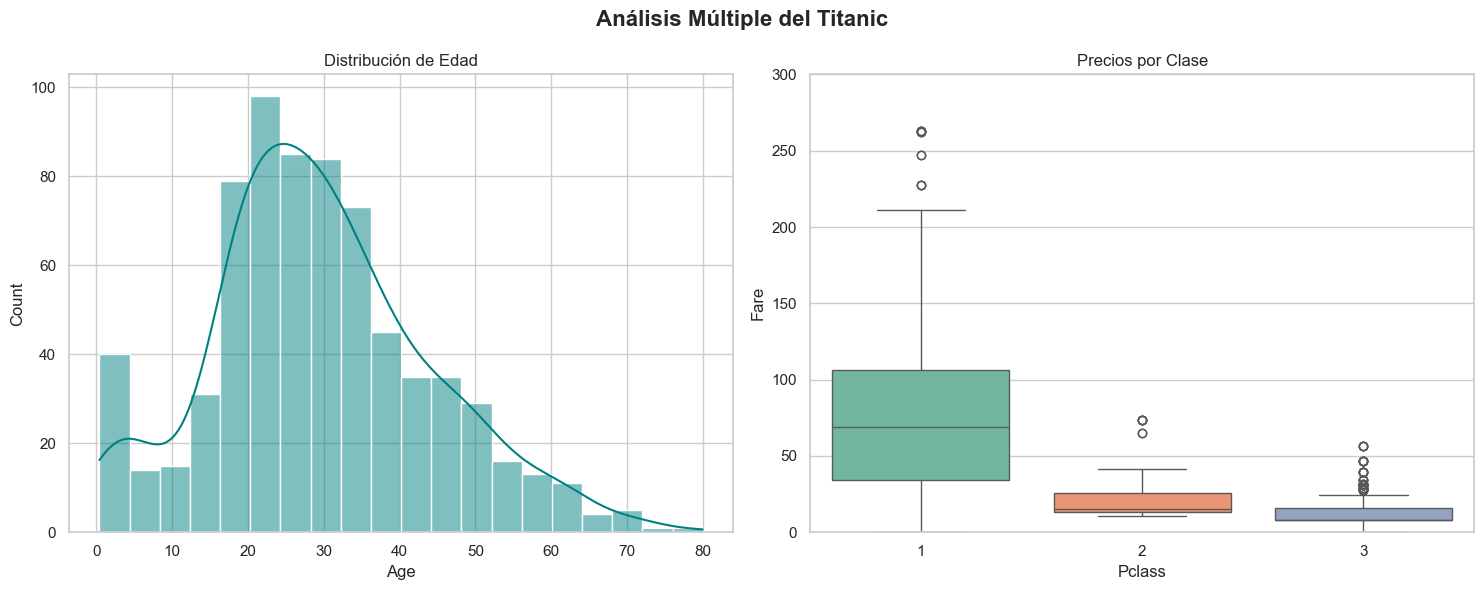

In [6]:
# 1. CREAR EL LIENZO (Figura)
# plt.subplots(1, 2): Crea una rejilla de 1 fila y 2 columnas (2 huecos para gráficos)
# figsize=(15, 6): Tamaño total de la imagen (15 de ancho, 6 de alto)
# fig: Es la hoja entera. axes: Es una lista con los 2 huecos [hueco_izq, hueco_der]
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- GRÁFICO A LA IZQUIERDA (axes[0]) ---
# Histograma de edades
# ax=axes[0]: ¡IMPORTANTE! Le decimos "dibújate en el primer hueco"
# kde=True: Dibuja la curvita suave de densidad encima de las barras
sns.histplot(data=df, x='Age', kde=True, ax=axes[0], color='teal')
# Ponemos título solo a este gráfico chiquito
axes[0].set_title('Distribución de Edad')

# --- GRÁFICO A LA DERECHA (axes[1]) ---
# Boxplot (Caja y Bigotes) para ver precios por clase
# x='Pclass': Categoría abajo (Clase 1, 2, 3)
# y='Fare': Precio a lo alto
sns.boxplot(data=df, x='Pclass', y='Fare', ax=axes[1], palette='Set2')
# Hacemos zoom en el eje Y (de 0 a 300) porque hay tickets de $500 que aplastan el gráfico
axes[1].set_ylim(0, 300)
# Título del segundo gráfico
axes[1].set_title('Precios por Clase')

# Título general para toda la figura (arriba del todo)
fig.suptitle('Análisis Múltiple del Titanic', fontsize=16, fontweight='bold')

# tight_layout(): Comando mágico que ajusta los márgenes para que los textos no se monten
plt.tight_layout()

# Mostramos todo
plt.show()

7. BONUS: Gráfico de Áreas Apiladas (Stackplot)
Por si el Inge pide algo raro que vio en la página 14 del PDF.

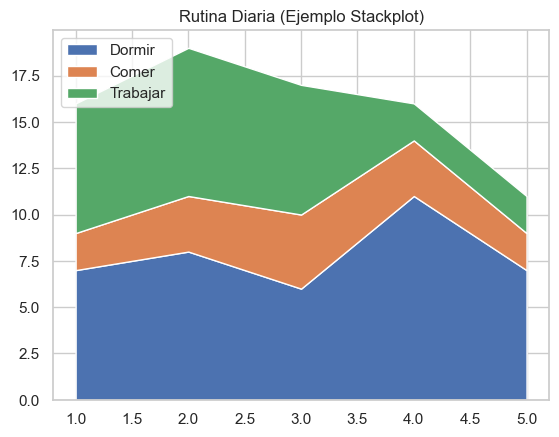

In [7]:
# Creamos datos falsos simples (listas de python) para el ejemplo
dias = [1, 2, 3, 4, 5]            # Eje X
durmiendo = [7, 8, 6, 11, 7]      # Datos serie 1
comiendo = [2, 3, 4, 3, 2]        # Datos serie 2
trabajando = [7, 8, 7, 2, 2]      # Datos serie 3

# --- STACKPLOT ---
# Pinta las áreas una encima de otra
# labels=[...]: Nombres para la leyenda
plt.stackplot(dias, durmiendo, comiendo, trabajando, labels=['Dormir', 'Comer', 'Trabajar'])

# Muestra la leyenda en la esquina superior izquierda
plt.legend(loc='upper left')

# Título del gráfico
plt.title('Rutina Diaria (Ejemplo Stackplot)')

# Mostrar
plt.show()